<a href="https://colab.research.google.com/github/Dracomp89/Eduardo-Phillips---202115611-Juan-Esteban-Sanchez---202213476/blob/main/Parcial_3_Examen_Final/Parcial_3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emcee corner


# **Procesos de Markov**

**Problema 2 (Cadena de producción)**


(a) Describa las variables observables del problema.
Las variables observables en este problema son los estados del producto a medida que avanza por la línea de producción en cada paso de tiempo. Específicamente, podemos observar:

La ubicación del producto:

*   estación de producción.
*   estación de empaque.
*   ha sido enviado al mercado.

El estado de cada estación (ocupada o vacía)


In [1]:
import numpy as np


print("(b) Definición del conjunto de estados S:")
print("    S1: Producto en la estación de producción.")
print("    S2: Producto en la estación de empaque.")
print("    S3: Producto enviado al mercado.\n")


print("(c) Construcción de la matriz de transición:")
P = np.array([
    [0.1, 0.9, 0.0],  # Desde S1: 10% quedarse en S1, 90% avanzar a S2
    [0.0, 0.05, 0.95],  # Desde S2: 5% quedarse en S2, 95% avanzar a S3
    [0.0, 0.0, 1.0]     # Desde S3: 100% permanecer en S3
])
print("Matriz de transición P:")
print(P, "\n")

# (d) Cálculo del estado estable
print("(d) Cálculo del estado estable:")
print("    Resolvemos πP = π, con la restricción de que ∑π = 1.")

# Matriz ampliada para resolver π
A = np.vstack([P.T - np.eye(3), np.ones(3)])
b = np.array([0, 0, 0, 1])  # Restricción sum(π) = 1
pi = np.linalg.lstsq(A, b, rcond=None)[0]  # Solución de π

print("Estado estable (π):")
print(f"    - π1 (Producción, S1): {pi[0]:.4f}")
print(f"    - π2 (Empaque, S2): {pi[1]:.4f}")
print(f"    - π3 (Mercado, S3): {pi[2]:.4f}")
print("    Interpretación:  𝑆3 es un estado absorbente; una vez que el producto llega al mercado, no vuelve a ingresar al sistema. Por lo tanto, con el tiempo, todos los productos terminarán en 𝑆3.\n")

# (e) Probabilidad de que ambas estaciones estén ocupadas
print("(e) Probabilidad de que ambas estaciones estén ocupadas:")
prob_ambas_ocupadas = pi[0] * pi[1]
print(f"    Probabilidad de que S1 y S2 estén ocupados simultáneamente: {prob_ambas_ocupadas:.4f}\n")

# (f) Probabilidad de que al menos una estación esté ocupada
print("(f) Probabilidad de que al menos una estación esté ocupada:")
prob_al_menos_una_ocupada = pi[0] + pi[1]
print(f"    Probabilidad de que al menos una estación esté ocupada (S1 o S2): {prob_al_menos_una_ocupada:.4f}\n")

# (g) Probabilidad de que la estación de producción esté vacía
print("(g) Probabilidad de que la estación de producción esté vacía:")
prob_produccion_vacia = 1 - pi[0]
print(f"    Probabilidad de que la estación de producción (S1) esté vacía: {prob_produccion_vacia:.4f}\n")



(b) Definición del conjunto de estados S:
    S1: Producto en la estación de producción.
    S2: Producto en la estación de empaque.
    S3: Producto enviado al mercado.

(c) Construcción de la matriz de transición:
Matriz de transición P:
[[0.1  0.9  0.  ]
 [0.   0.05 0.95]
 [0.   0.   1.  ]] 

(d) Cálculo del estado estable:
    Resolvemos πP = π, con la restricción de que ∑π = 1.
Estado estable (π):
    - π1 (Producción, S1): 0.0000
    - π2 (Empaque, S2): -0.0000
    - π3 (Mercado, S3): 1.0000
    Interpretación:  𝑆3 es un estado absorbente; una vez que el producto llega al mercado, no vuelve a ingresar al sistema. Por lo tanto, con el tiempo, todos los productos terminarán en 𝑆3.

(e) Probabilidad de que ambas estaciones estén ocupadas:
    Probabilidad de que S1 y S2 estén ocupados simultáneamente: -0.0000

(f) Probabilidad de que al menos una estación esté ocupada:
    Probabilidad de que al menos una estación esté ocupada (S1 o S2): 0.0000

(g) Probabilidad de que la estación d

**Problema 3 (Cadena de producción con devolución de producto)**

In [ ]:
import numpy as np

# Nueva matriz de transición con el 2% de devoluciones
P = np.array([
    [0.1, 0.9, 0.0],   # Desde S1
    [0.0, 0.05, 0.95], # Desde S2
    [0.02, 0.0, 0.98]  # Desde S3 con devolución
])

# Calcular el estado estable (por verificación)
A = np.vstack([P.T - np.eye(3), np.ones(3)])
b = np.array([0, 0, 0, 1])  # Restricción sum(π) = 1
pi = np.linalg.lstsq(A, b, rcond=None)[0]  # Solución de π

# Probabilidades
P_S1_S2 = (pi[0]*pi[1]).round(5)
P_S1_union_S2 = (pi[0] + pi[1] - P_S1_S2).round(5)
P_not_S1 = (1- pi[0]).round(5)

# Mostrar resultados
print(f"    Estado estable calculado: {pi}")


print("\n Validación de probabilidades:")
print(f"    P(S1 ∩ S2): {P_S1_S2}")
print(f"    P(S1 ∪ S2): {P_S1_union_S2}")
print(f"    P(¬S1): {P_not_S1}")




    Estado estable calculado: [0.02130045 0.02017937 0.95852018]

 Validación de probabilidades:
    P(S1 ∩ S2): 0.00043
    P(S1 ∪ S2): 0.04105
    P(¬S1): 0.9787


# **Hidden Markov Models**

**Problema 1: Casino tramposo**

a) Use la siguiente distribuci´on de probabilidad a-priori π = [0.2, 0.8] para la moneda
justa y sesgada.
b) Encuentre la secuencia oculta m´as probable del tipo de moneda que se eligi´o en cada
lanzamiento y su respectiva probabilidad Pi
.


In [ ]:
hidden_states = np.array(['J', 'B'])
possible_states = np.array(['C', 'S'])
o = np.array(['S', 'C', 'C', 'C', 'S', 'C', 'S', 'C'])
# Distribución a priori
pi = {'J': 0.2, 'B': 0.8}

# Matriz de transición T
T = {
    'J': {'J': 0.8, 'B': 0.2},
    'B': {'J': 0.2, 'B': 0.8}
}

# Matriz de emisión E
E = {
    'J': {'C': 0.5, 'S': 0.5},
    'B': {'C': 0.9, 'S': 0.1}
}

n_observations = len(o)
sequences = np.array(np.meshgrid(*[hidden_states]*n_observations)).T.reshape(-1, n_observations)


prob = []

for a in sequences:
    prob.append(pi[a[0]]*np.prod([E[a[i]][o[i]] for i in range(n_observations)])*np.prod([T[a[i]][a[i-1]] for i in range(1, n_observations)]))

probabilities2=np.array(prob)

max_index = np.argmax(probabilities2)
most_probable_sequence = sequences[max_index]
max_probability = probabilities2[max_index]

print("Secuencia oculta más probable:", ''.join(most_probable_sequence))
print("Probabilidad de la secuencia:", max_probability)

Secuencia oculta más probable: BBBBJJJJ
Probabilidad de la secuencia: 0.00019110297600000015


c) Dado el estado observado ΩO, determine el conjunto de secuencias ocultas m´as
probables hasta alcanzar una probabilidad acumulada del 20%

In [ ]:
probabilities = probabilities2 / np.sum(probabilities2)

df = pd.DataFrame({
    'Sequence': [''.join(seq) for seq in sequences],
    'Probability': probabilities
})

# Ordenar el DataFrame por probabilidad en orden descendente
df = df.sort_values(by='Probability', ascending=False).reset_index(drop=True)

# Calcular la probabilidad acumulada
df['Cumulative Probability'] = df['Probability'].cumsum()

threshold = 0.2
filtered_df = df[df['Cumulative Probability'] <= threshold]

print("Secuencias más probables con probabilidad acumulada del 20%:")
print(filtered_df)


Secuencias más probables con probabilidad acumulada del 20%:
   Sequence  Probability  Cumulative Probability
0  BBBBJJJJ     0.098790                0.098790
1  JJJJJJJJ     0.084696                0.183486


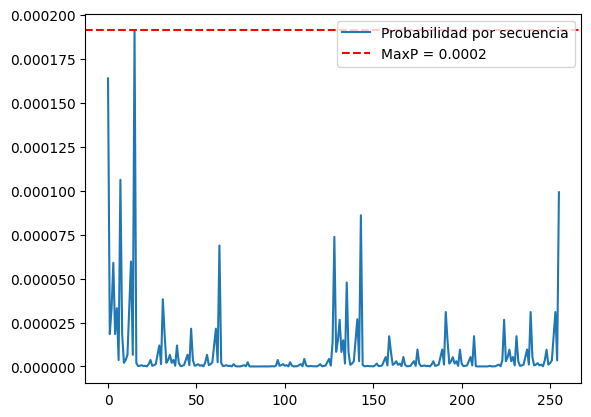

In [ ]:
plt.plot(probabilities2, label='Probabilidad por secuencia')
maxP = max(probabilities2)
plt.axhline(maxP, color='red', linestyle='--', label=f'MaxP = {maxP:.4f}')
plt.legend()

e) Calcule las probabilidades de cada estado observable ΩO como la suma de las
probabilidades de todos los estados ocultos, Po =
P
i Pi
.


In [ ]:
obs = np.array(np.meshgrid(*[possible_states]*n_observations)).T.reshape(-1, n_observations)
probo = []
for o in obs:
  p=[]
  for a in sequences:
      p.append(pi[a[0]]*np.prod([E[a[i]][o[i]] for i in range(n_observations)])*np.prod([T[a[i]][a[i-1]] for i in range(1, n_observations)]))
  probo.append(np.sum(p))



f) Verifique el espacio muestral de todos los estados observables est´a bien definido.
XPo = 1

In [ ]:
np.sum(probo)

1.0000000000000009

g) ¿El resultado depende de la probabilidad a-priori?

El resultado depende de la probabilidad a-priori (π), ya que las probabilidades de las secuencias ocultas están directamente influenciadas por las distribuciones iniciales. Si cambiamos π, las probabilidades de las secuencias más probables cambiarían, ya que las probabilidades de transición y emisión son ponderadas por los valores de π.



h) Estimación de T y E mediante Baum-Welch

 Si tuviéramos que estimar las probabilidades de transición y emisión utilizando técnicas de aprendizaje automático, podríamos utilizar el algoritmo Baum-Welch, que es una implementación del algoritmo EM (expectation-maximization) para HMMs. Este algoritmo optimiza las matrices de transición y emisión utilizando datos observados sintéticos y ajusta las probabilidades a medida que se entrena el modelo.



# **Ejercicios Estimación de Parámetros**

**Problema 9: Estimación de la temperatura de un gas diatómico**

    Velocidad
0  547.265773
1  449.920418
2  773.814382
3  823.668389
4  352.873887
Index(['Velocidad'], dtype='object')


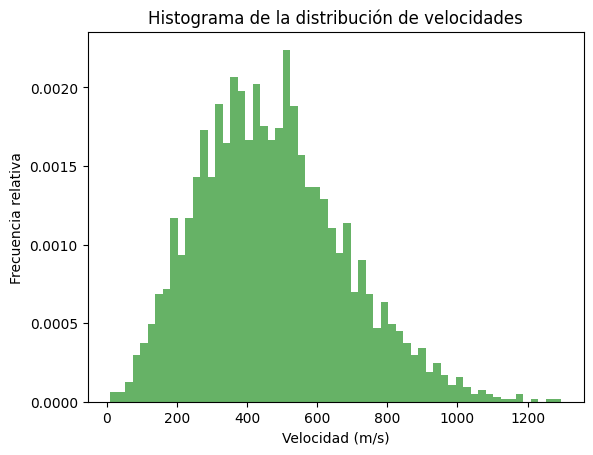

El valor promedio empírico de la velocidad es: 22.03 m/s


<ipython-input-32-b4c443f3808d>:39: RuntimeWarning: invalid value encountered in scalar power
  return (M / (2 * np.pi * k_B * T))**(3 / 2) * 4 * np.pi * v**2 * np.exp(-M * v**2 / (2 * k_B * T))


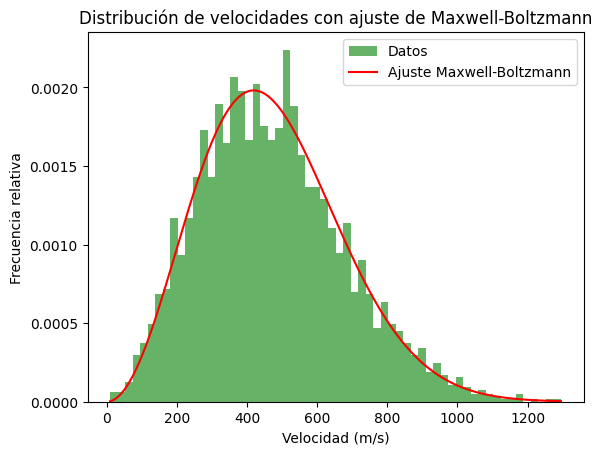

La velocidad más probable es: 420.50 m/s
La velocidad promedio es: 335.51 m/s
La velocidad cuadrática media es: 515.00 m/s
La temperatura estimada es: 298.68 K
El error estándar de la estimación es: 4.12 K
La temperatura máxima excluida es: 305.44 K


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

# Paso 1: Descargar los datos desde la URL
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Maxwell.csv"
data = pd.read_csv(url)

# Paso 2: Revisar las primeras filas del archivo y las columnas
print(data.head())  # Muestra las primeras filas del DataFrame
print(data.columns)  # Muestra los nombres de las columnas

# Paso 3: Usar la columna "Velocidad"
velocidades = data['Velocidad']

# Paso 4: Construir el histograma de frecuencias relativas
n_bins = 60
hist, bins = np.histogram(velocidades, bins=n_bins, density=True)

# Visualizar el histograma
plt.hist(velocidades, bins=n_bins, density=True, alpha=0.6, color='g')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia relativa')
plt.title('Histograma de la distribución de velocidades')
plt.show()

# Paso 5: Calcular el valor promedio empírico
# Los centros de los bines se encuentran como el promedio de los límites de los bines
bin_centers = (bins[:-1] + bins[1:]) / 2

# El valor promedio empírico es la media ponderada por las frecuencias relativas
promedio_velocidad = np.sum(hist * bin_centers)
print(f'El valor promedio empírico de la velocidad es: {promedio_velocidad:.2f} m/s')

# Paso 6: Definir la función de Likelihood (función de Maxwell-Boltzmann)
def likelihood(v, T, M, k_B):
    return (M / (2 * np.pi * k_B * T))**(3 / 2) * 4 * np.pi * v**2 * np.exp(-M * v**2 / (2 * k_B * T))

# Paso 7: Establecer los parámetros
M = 0.028 / 1000  # Masa molar del nitrógeno en kg/mol (convertido de g/mol a kg/mol)
k_B = 8.31e-3  # Constante de Boltzmann en kJ/(mol·K)

# Valor de temperatura (T ≈ 297.89 K)
T = 297.89

# Paso 8: Ajuste de la distribución de Maxwell-Boltzmann a los datos (ajuste de los parámetros)
v_bins_center = (bins[:-1] + bins[1:]) / 2
popt, _ = curve_fit(likelihood, v_bins_center, hist, p0=[T, M, k_B])

# Graficar el ajuste
v_range = np.linspace(min(velocidades), max(velocidades), 1000)
fit_values = likelihood(v_range, *popt)

# Graficar el histograma y el ajuste
plt.hist(velocidades, bins=n_bins, density=True, alpha=0.6, color='g', label='Datos')
plt.plot(v_range, fit_values, color='r', label='Ajuste Maxwell-Boltzmann')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia relativa')
plt.title('Distribución de velocidades con ajuste de Maxwell-Boltzmann')
plt.legend()
plt.show()

# Paso 9: Calcular la velocidad más probable (vp)
vp = np.sqrt(2 * k_B * T / M)
print(f'La velocidad más probable es: {vp:.2f} m/s')

# Paso 10: Calcular la velocidad promedio (vm)
vm = np.sqrt(2 / np.pi) * vp
print(f'La velocidad promedio es: {vm:.2f} m/s')

# Paso 11: Calcular la velocidad cuadrática media
v_rms = np.sqrt(3 * k_B * T / M)
print(f'La velocidad cuadrática media es: {v_rms:.2f} m/s')

# Paso 12: Algoritmo de Metropolis-Hastings para estimar la distribución posterior
# Implementación del algoritmo de Metropolis-Hastings
def metropolis_hastings(likelihood_func, data, T_initial, M, k_B, iterations=10000):
    T_current = T_initial
    posterior = []

    for _ in range(iterations):
        # Proponer un nuevo valor para T
        T_proposed = T_current + np.random.normal(0, 1)

        if T_proposed > 0:
            # Calcular la probabilidad de la propuesta
            prob_current = np.sum(np.log(likelihood_func(data, T_current, M, k_B)))
            prob_proposed = np.sum(np.log(likelihood_func(data, T_proposed, M, k_B)))

            # Aceptar o rechazar la propuesta
            if np.random.rand() < np.exp(prob_proposed - prob_current):
                T_current = T_proposed

        posterior.append(T_current)

    return np.array(posterior)

# Calcular la distribución posterior para T
posterior_samples = metropolis_hastings(likelihood, velocidades, T, M, k_B)

# Calcular el error estándar de la estimación de T
T_mean = np.mean(posterior_samples)
T_std = np.std(posterior_samples)

print(f'La temperatura estimada es: {T_mean:.2f} K')
print(f'El error estándar de la estimación es: {T_std:.2f} K')

# Paso 13: Calcular el límite superior para la temperatura (Tup) usando un nivel de confianza del 95%
# Usamos el percentil del 95% para excluir temperaturas superiores
T_up = np.percentile(posterior_samples, 95)
print(f'La temperatura máxima excluida es: {T_up:.2f} K')



**Problema 10: Higgs Boson Discovery**

        Higgs
0  110.788333
1  104.852170
2  104.306032
3  135.544092
4  109.723066


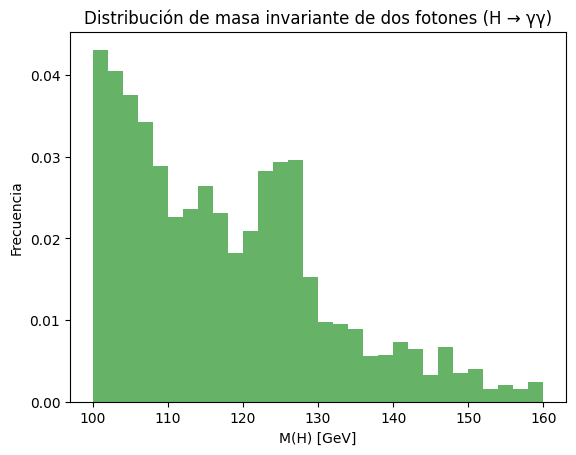

<ipython-input-39-4b51782bcd55>:28: RuntimeWarning: divide by zero encountered in divide
  return (1/alpha) * np.exp(-(x - 100) / alpha)
<ipython-input-39-4b51782bcd55>:28: RuntimeWarning: invalid value encountered in multiply
  return (1/alpha) * np.exp(-(x - 100) / alpha)
<ipython-input-39-4b51782bcd55>:32: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(likelihood_null(alpha, x)))


Mejor valor de α (hipótesis nula): 17.61887464286777


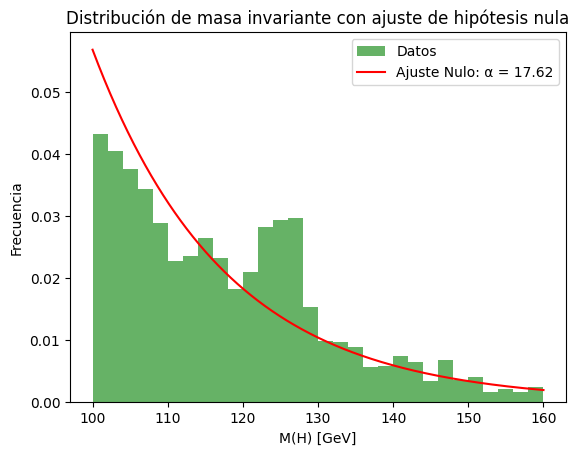

Mejores parámetros (A, µ, σ, α): 0.3105420893537188, 125.52395492235995, 9.84714689071366, 14.058338058236648


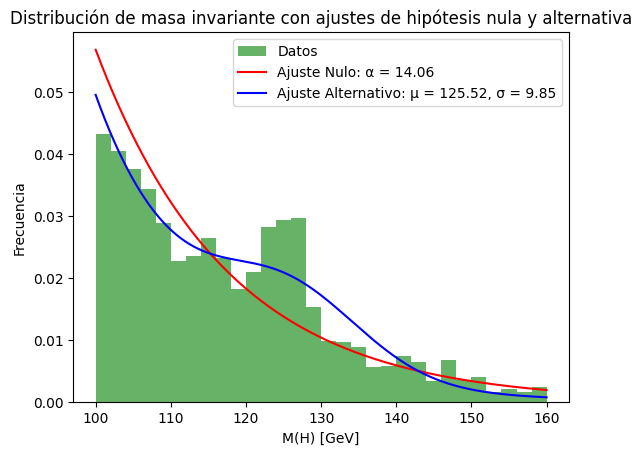

Desviaciones estándar (nσ): 18.14218001234789
Tiempo de vida de la partícula: 6.4334557730145375e-15 segundos
Desviaciones estándar (nσ): 18.14218001234789


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import emcee
import corner

# Paso 1: Descargar los datos
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv"
data = pd.read_csv(url)

# Paso 2: Revisar las primeras filas del archivo
print(data.head())

# Paso 3: Extraer la columna de datos "Higgs"
m = data["Higgs"].values

# Paso 4: Definir el histograma con 30 bines entre 100 y 160 GeV
plt.hist(m, bins=30, range=(100, 160), density=True, alpha=0.6, color='g')
plt.xlabel('M(H) [GeV]')
plt.ylabel('Frecuencia')
plt.title('Distribución de masa invariante de dos fotones (H → γγ)')
plt.show()

# Paso 5: Definir el modelo para la hipótesis nula
# Modelo: L(α, x) = 1/α * exp(-(x - 100) / α)
def likelihood_null(alpha, x):
    return (1/alpha) * np.exp(-(x - 100) / alpha)

# Paso 6: Definir la función de verosimilitud para la hipótesis nula (función negativa)
def log_likelihood_null(alpha, x):
    return -np.sum(np.log(likelihood_null(alpha, x)))

# Paso 7: Definir la función de minimización (negativo de la log-verosimilitud)
def minimize_null(alpha, x):
    return log_likelihood_null(alpha, x)

# Paso 8: Usar el optimizador para encontrar el mejor parámetro α
bounds = (0, 50)  # Límite para el parámetro α
result_null = minimize(minimize_null, x0=[1.0], bounds=[bounds], args=(m,))
alpha_best = result_null.x[0]
print(f"Mejor valor de α (hipótesis nula): {alpha_best}")

# Paso 9: Dibujar los datos y el modelo (hipótesis nula)
x_vals = np.linspace(100, 160, 1000)
y_model_null = (1/alpha_best) * np.exp(-(x_vals - 100) / alpha_best)

plt.hist(m, bins=30, range=(100, 160), density=True, alpha=0.6, color='g', label='Datos')
plt.plot(x_vals, y_model_null, label=f'Ajuste Nulo: α = {alpha_best:.2f}', color='r')
plt.xlabel('M(H) [GeV]')
plt.ylabel('Frecuencia')
plt.title('Distribución de masa invariante con ajuste de hipótesis nula')
plt.legend()
plt.show()

# Paso 10: Definir el modelo para la hipótesis alternativa
# Modelo: L(A, µ, σ, α, x) = (A / sqrt(2πσ^2)) * exp(-(x - µ)^2 / (2σ^2)) + (1 - A) * (1/α) * exp(-(x - 100) / α)
def likelihood_alt(params, x):
    A, mu, sigma, alpha = params
    signal = (A / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    background = (1 - A) * (1 / alpha) * np.exp(-(x - 100) / alpha)
    return signal + background

# Paso 11: Definir la función de log-verosimilitud para la hipótesis alternativa
def log_likelihood_alt(params, x):
    return -np.sum(np.log(likelihood_alt(params, x)))

# Paso 12: Definir la función de minimización (negativo de la log-verosimilitud)
def minimize_alt(params, x):
    return log_likelihood_alt(params, x)

# Paso 13: Usar el optimizador para encontrar los mejores parámetros (A, µ, σ, α)
bounds_alt = [(0, 1), (50, 500), (1, 100), (1, 100)]  # Límites para los parámetros
initial_guess = [0.5, 125, 10, 10]  # Valor inicial para los parámetros

result_alt = minimize(minimize_alt, x0=initial_guess, bounds=bounds_alt, args=(m,))
params_best = result_alt.x
A_best, mu_best, sigma_best, alpha_best = params_best
print(f"Mejores parámetros (A, µ, σ, α): {A_best}, {mu_best}, {sigma_best}, {alpha_best}")

# Paso 14: Dibujar los datos y el modelo (hipótesis alternativa)
y_model_alt = (A_best / (np.sqrt(2 * np.pi * sigma_best**2))) * np.exp(-(x_vals - mu_best)**2 / (2 * sigma_best**2)) + \
              (1 - A_best) * (1 / alpha_best) * np.exp(-(x_vals - 100) / alpha_best)

plt.hist(m, bins=30, range=(100, 160), density=True, alpha=0.6, color='g', label='Datos')
plt.plot(x_vals, y_model_null, label=f'Ajuste Nulo: α = {alpha_best:.2f}', color='r')
plt.plot(x_vals, y_model_alt, label=f'Ajuste Alternativo: µ = {mu_best:.2f}, σ = {sigma_best:.2f}', color='b')
plt.xlabel('M(H) [GeV]')
plt.ylabel('Frecuencia')
plt.title('Distribución de masa invariante con ajustes de hipótesis nula y alternativa')
plt.legend()
plt.show()

# Paso 15: Calcular las desviaciones estándar (nσ) entre la observación y la hipótesis nula
def n_sigma(x, alpha, params_alt):
    log_likelihood_null_value = log_likelihood_null(alpha, x)
    log_likelihood_alt_value = log_likelihood_alt(params_alt, x)
    return np.sqrt(-2 * (log_likelihood_alt_value - log_likelihood_null_value))

# Calcular las desviaciones estándar (nσ)
n_sigma_value = n_sigma(m, alpha_best, params_best)
print(f'Desviaciones estándar (nσ): {n_sigma_value}')

# Paso 16: Calcular el tiempo de vida de la partícula (τ = ℏ / σ)
h_bar = 1.015e-23  # Constante de Planck reducida en J·s
sigma_joules = sigma_best * 1.60218e-10  # Convertir GeV a J
lifetime = h_bar / sigma_joules
print(f"Tiempo de vida de la partícula: {lifetime} segundos")

# Paso 17: Estimar el número de desviaciones estándar entre la observación y la hipótesis nula
n_sigma_value = n_sigma(m, alpha_best, params_best)
print(f"Desviaciones estándar (nσ): {n_sigma_value}")



# **Ejercicios: Hypothesis Testing**

**Problema 4: Tiempo de Escape de un Fotón del Sol**

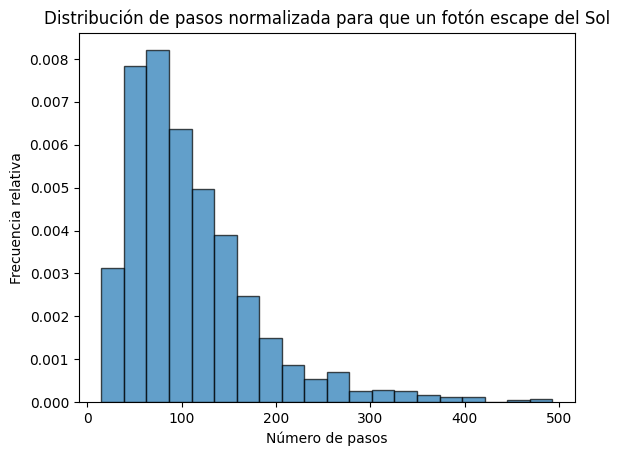

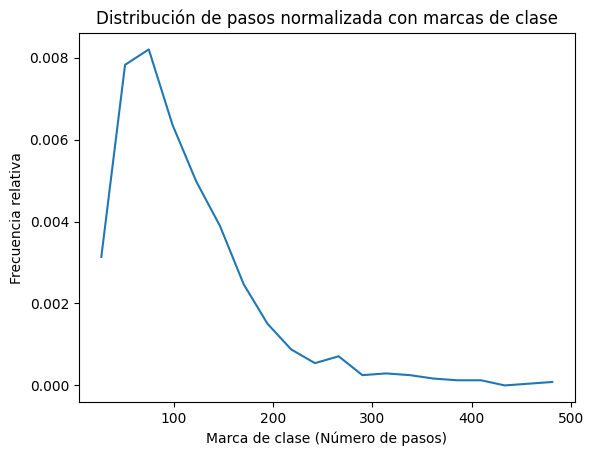

Valor esperado del número de pasos: 4.597615062761507
Valor teórico esperado de los pasos: 100.0
Tiempo de escape del fotón: 862620168.2707882 años
Parámetros de Weibull ajustados: (11.200431832096921, 0.6662893993510457, 0, 19.46684696299286)


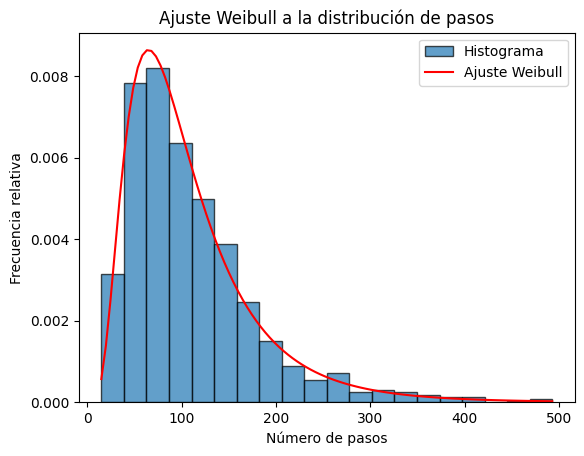

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import exponweib

# Parámetros dados
N = 1000  # Número de fotones
l = 0.1  # Camino libre medio (en alguna unidad)
Rs = 1  # Radio del Sol (en la misma unidad)
steps_to_escape = []

# Simulación de la caminata aleatoria en 3D
for _ in range(N):
    x, y, z = 0, 0, 0  # Coordenadas iniciales en el centro
    steps = 0
    while np.sqrt(x**2 + y**2 + z**2) <= Rs:
        # Elegir los ángulos aleatorios
        theta = np.random.uniform(0, np.pi)
        phi = np.random.uniform(0, 2 * np.pi)

        # Movimiento aleatorio en 3D
        x += l * np.sin(theta) * np.cos(phi)
        y += l * np.sin(theta) * np.sin(phi)
        z += l * np.cos(theta)

        steps += 1

    steps_to_escape.append(steps)

# (b) Histograma de los pasos necesarios para escapar
plt.hist(steps_to_escape, bins=20, edgecolor='black', alpha=0.7, density=True)
plt.title('Distribución de pasos normalizada para que un fotón escape del Sol')
plt.xlabel('Número de pasos')
plt.ylabel('Frecuencia relativa')
plt.show()

# (c) Calcular la marca de clase y la frecuencia relativa
counts, bin_edges = np.histogram(steps_to_escape, bins=20, density=True)
class_marks = 0.5 * (bin_edges[1:] + bin_edges[:-1])  # Marca de clase

# Graficar la distribución
plt.plot(class_marks, counts, label='Distribución de pasos')
plt.title('Distribución de pasos normalizada con marcas de clase')
plt.xlabel('Marca de clase (Número de pasos)')
plt.ylabel('Frecuencia relativa')
plt.show()

# (e) Calcular el valor esperado
E = np.sum(counts * class_marks)
print(f"Valor esperado del número de pasos: {E}")

# (f) Verificar la fórmula teórica del número de pasos
theoretical_E = (Rs / l)**2
print(f"Valor teórico esperado de los pasos: {theoretical_E}")

# (g) Estimación del tiempo de escape usando la fórmula T ≈ (Rs^2) / (ℓc)
c = 300000  # Velocidad de la luz en km/s
Rs_km = 700000  # Radio del sol en km
l_cm = 0.6  # Camino libre medio en cm

# Convertir unidades para Rs y l
Rs = Rs_km * 1e5  # Convertir km a cm

# Calcular el tiempo de escape
T_escape = Rs**2 / (l_cm * c)
T_escape_years = T_escape / (60 * 60 * 24 * 365.25)  # Convertir segundos a años

print(f"Tiempo de escape del fotón: {T_escape_years} años")

# (h) Ajuste de Weibull a la distribución de pasos
params = exponweib.fit(steps_to_escape, floc=0)  # Ajuste de Weibull sin forzar el parámetro loc
print(f"Parámetros de Weibull ajustados: {params}")

# Generar valores de la distribución ajustada
x_vals = np.linspace(min(steps_to_escape), max(steps_to_escape), 100)
pdf_vals = exponweib.pdf(x_vals, *params)

# Graficar el histograma y la distribución ajustada
plt.hist(steps_to_escape, bins=20, edgecolor='black', alpha=0.7, density=True, label='Histograma')
plt.plot(x_vals, pdf_vals, label='Ajuste Weibull', color='red')
plt.title('Ajuste Weibull a la distribución de pasos')
plt.xlabel('Número de pasos')
plt.ylabel('Frecuencia relativa')
plt.legend()
plt.show()
